In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
!pip install rdkit

In [ ]:
!pip install ase

In [ ]:
import os
import pandas as pd
import sys
import json
data_home = '/content/drive/MyDrive/FACT_EFRC'
# Update to include the correct path to your custom modules
dependent_functions_path = os.path.join(data_home, 'Claude-GPT-paper', 'dependent_functions')
sys.path.append(dependent_functions_path)
from loading_roar_colab_results import load_json_as_dict, map_smiles_to_latent_df

from paper_plotting_results_notebook import (
    generate_prompt_table,
    plot_latent_space_averaged_by_prompt_grid,
    plot_stacked_plots
)

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


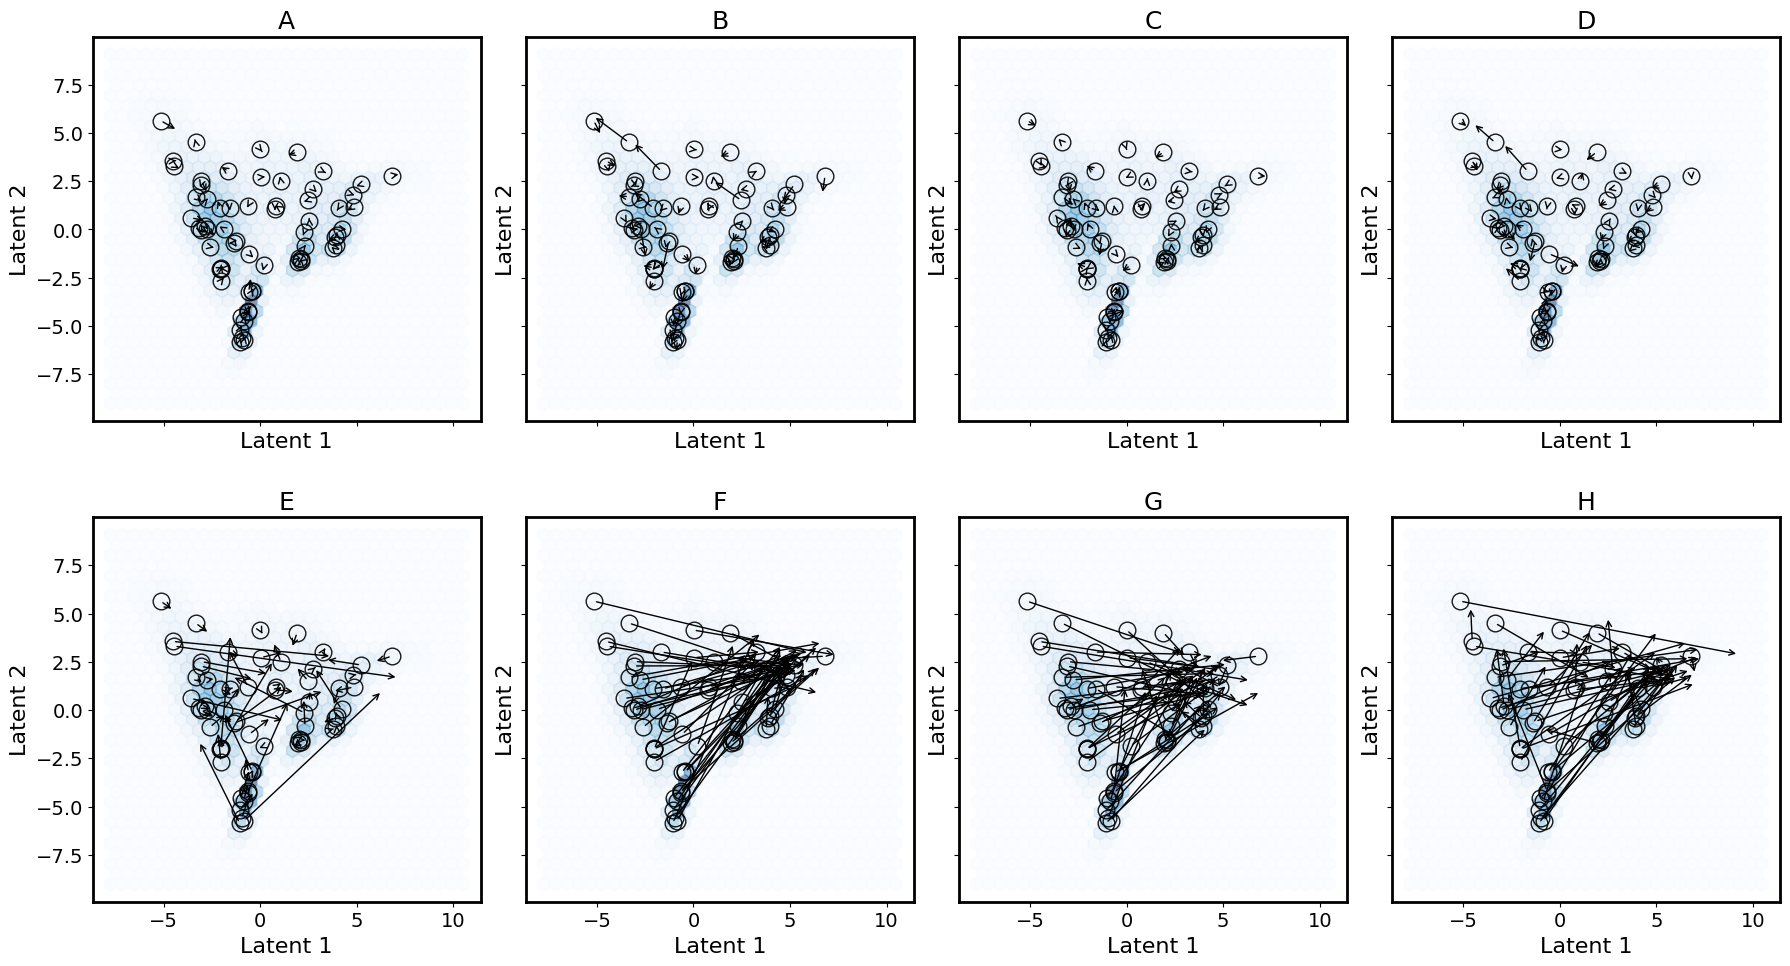

/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/dependent_functions/paper_plotting_results_notebook.py:737: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[0], data=distance_plot_df, x='Prompt Identifier', y='Distance', palette=palette)
/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/dependent_functions/paper_plotting_results_notebook.py:749: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(ax=axes[i + 1], data=filtered_data, x='Prompt Identifier', y='Value', palette=palette)
/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/dependent_functions/paper_plotting_results_notebook.py:749: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.1

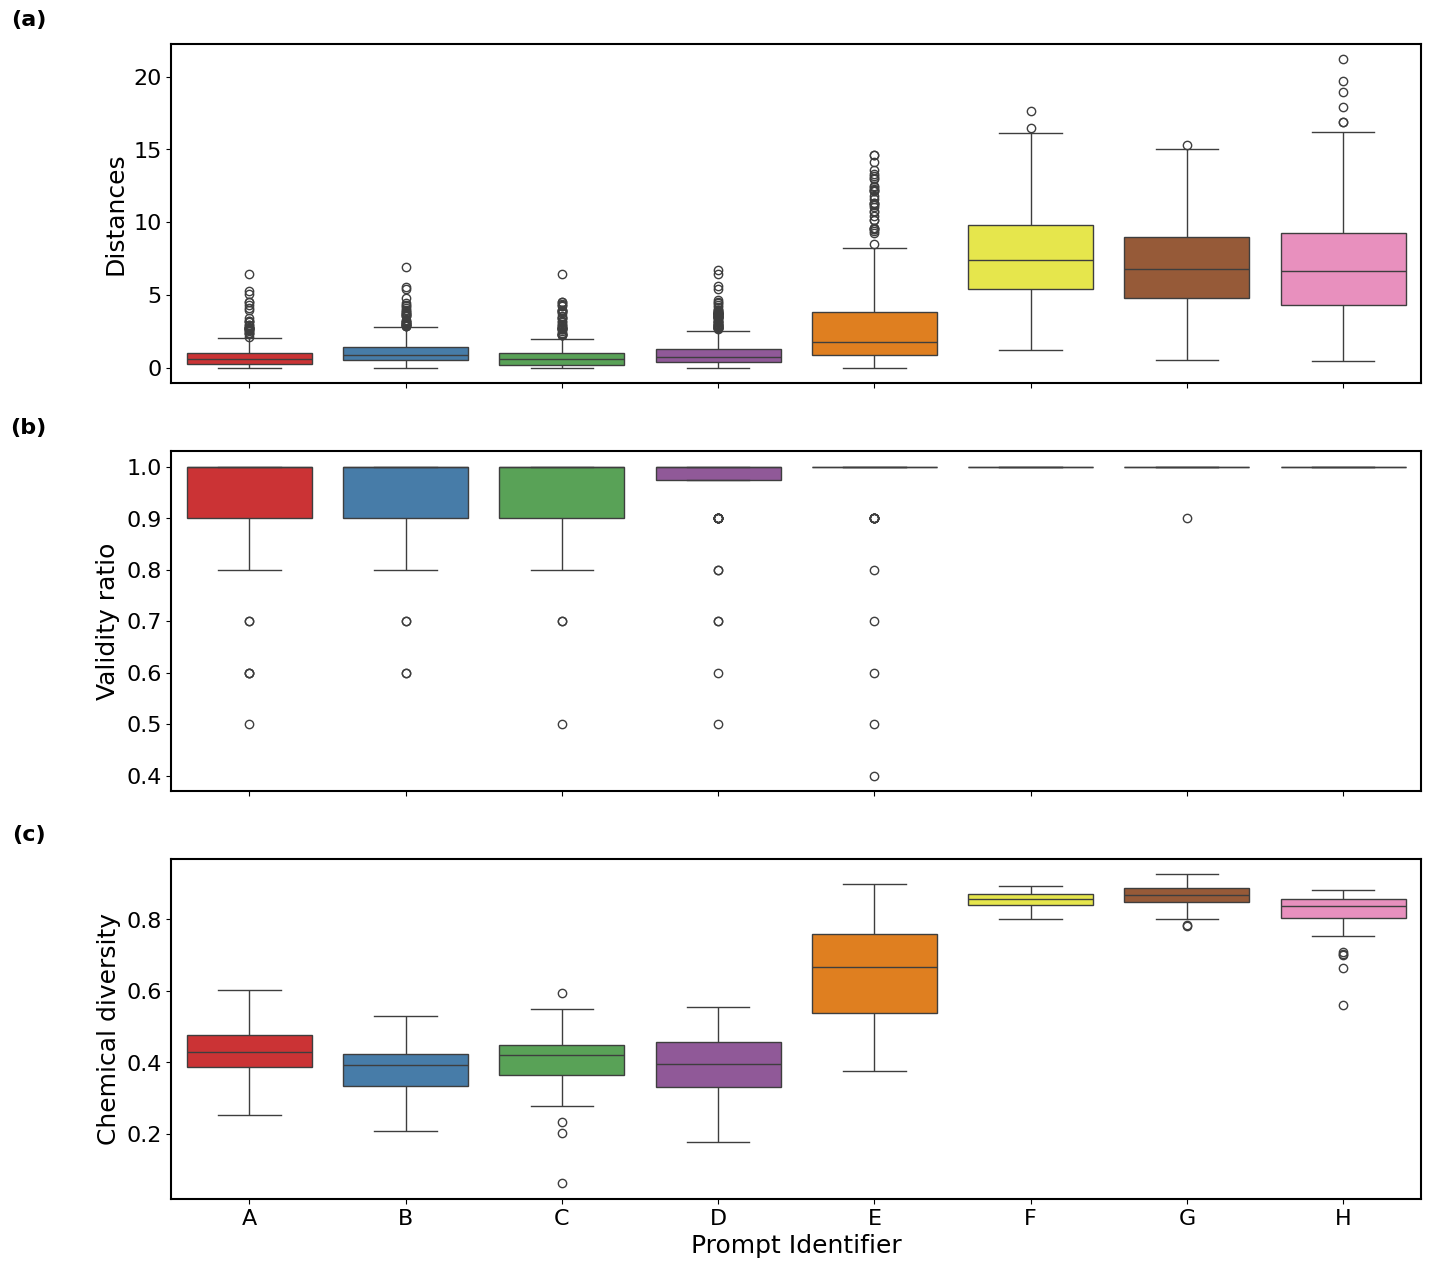

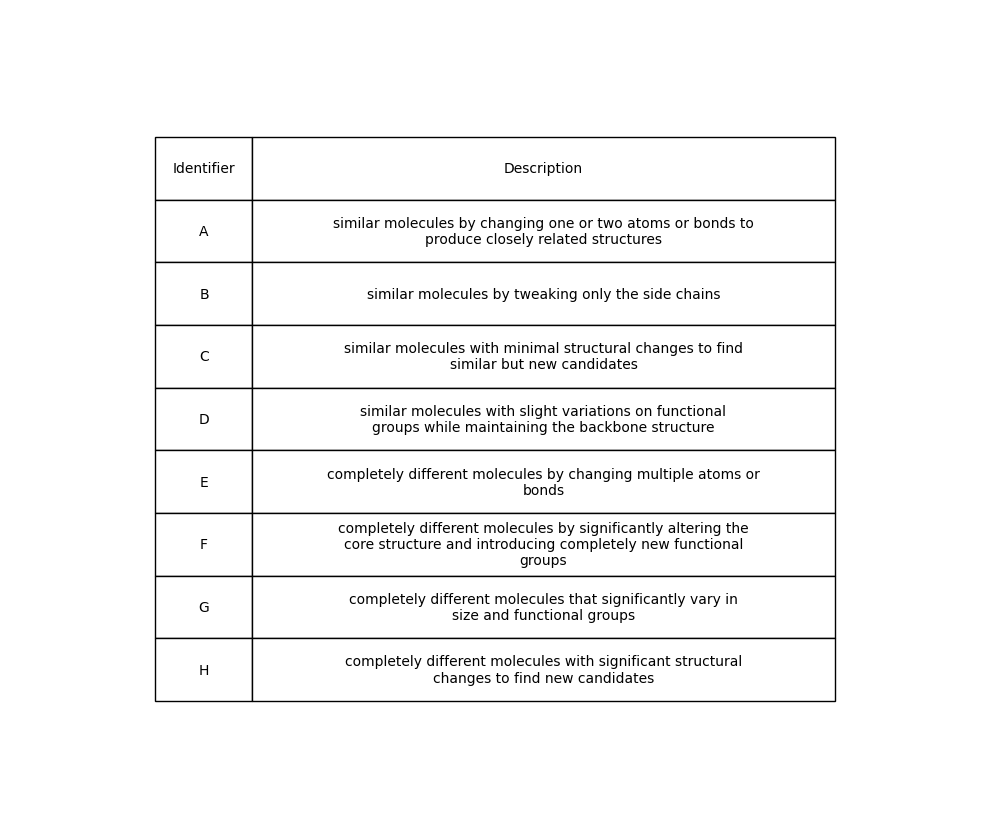

In [ ]:
def setup_paths(data_home,overall_results_filename):
    paths = {
        "common_keys_path": os.path.join(data_home, 'Claude-GPT-paper','fact-dropbox/zinc/tranches/out/IdentifyCommonMFPKeys-WriteAllMorganFingerprints-ConcatCSV-2D-AK-AKEC-000.json'),
        "pretrained_pca_path": os.path.join(data_home,'Claude-GPT-paper', 'fact-dropbox/zinc/tranches/out/StructureEmbeddingMany-TransformMorganFingerprints-WriteAllMorganFingerprints-ConcatCSV-2D-AK-AKEC-009.lzma'),
        "overall_results_path": os.path.join(data_home, 'Claude-GPT-paper', 'out', overall_results_filename),
        "base_save_path": os.path.join(data_home, 'Claude-GPT-paper', 'out', 'Figures')
    }
    return paths
def load_json_as_dict(filename):
    """
    Loads a JSON file into a Python dictionary.

    Parameters:
    - filename (str): The name of the JSON file to be loaded.

    Returns:
    - dict: The Python dictionary loaded from the JSON file.
    """
    with open(filename, 'r') as file:
        data = json.load(file)
    return data

def load_data(overall_results_path, radius, common_keys_path, pretrained_pca_path):
    overall_results = load_json_as_dict(overall_results_path)

    # Calculate the path to the updated smiles_latent_map
    smiles_latent_map_path = os.path.join(os.path.dirname(overall_results_path), "smiles_latent_map_updated.json")

    # Load the updated smiles_latent_map
    #smiles_latent_map = load_json_as_dict(smiles_latent_map_path)

    # Previous way of loading smiles_latent_map, commented out for future reference
    smiles_latent_map = map_smiles_to_latent_df(overall_results, radius, common_keys_path, pretrained_pca_path)

    return overall_results, smiles_latent_map


def generate_all_plots(overall_results, smiles_latent_map, base_save_path, data_home,quantities):

    fname = os.path.join(data_home,'Claude-GPT-paper', 'fact-dropbox', 'zinc', 'tranches', 'out', 'StructureEmbeddingMany-TransformMorganFingerprints-WriteAllMorganFingerprints-ConcatCSV-2D-AK-AKEC-009.csv')
    plot_latent_space_averaged_by_prompt_grid(overall_results, smiles_latent_map, fname,  'distances_latentP_space.pdf')
    plot_stacked_plots(overall_results, smiles_latent_map, quantities,  'stacked_subplots_GPT.pdf')
    generate_prompt_table(overall_results, smiles_latent_map, word_limit_per_line=6, save_path='prompt_table.pdf')

if __name__ == '__main__':
    overall_results_filename='claude_overall_results_A-H_2024-04-11_18-36-01.json'
    quantities = ['validity_ratio', 'chemical_diversity']

    paths = setup_paths(data_home,overall_results_filename)
    overall_results, smiles_latent_map = load_data(paths['overall_results_path'], 2, paths['common_keys_path'], paths['pretrained_pca_path'])
    generate_all_plots(overall_results, smiles_latent_map, paths['base_save_path'],data_home,quantities)


# Homo lumo energies

In [ ]:
from homo_lumo_energies import (process_and_analyze_homo_lumo_energy_data,
                                plot_combined_homo_lumo_energy_differences)

In [ ]:

A_H_overall_results_filename = 'claude_overall_results_A-H_2024-04-11_18-36-01.json'
EWG_overall_results_filename = 'claude_overall_results_EWG_hickner2024-04-11_02-08-21.json'
EDG_overall_results_filename = 'claude_overall_results_EDG_hickner2024-04-12_11-13-35.json'
allowed_keys = ['A', 'B', 'C', 'D']

# Processing for A-H dataset
A_H_results = process_and_analyze_homo_lumo_energy_data(data_home, A_H_overall_results_filename, allowed_keys=allowed_keys)
print("Processed A-H Dataset:", A_H_results)

# Processing for EWG dataset
EWG_results = process_and_analyze_homo_lumo_energy_data(data_home, EWG_overall_results_filename)
print("Processed EWG Dataset:", EWG_results)

# Processing for EWG dataset
EDG_results = process_and_analyze_homo_lumo_energy_data(data_home, EDG_overall_results_filename,
                                                        allowed_keys=None,
                                                        radius=2,
                                                        start_letter='M')
print("Processed EDG Dataset:", EDG_results)


MOPAC Energy folder Path: /content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/pm7_charge_calculation/xyz_claude_overall_results_A-H_2024-04-11_18-36-01


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Streaming output truncated to the last 5000 lines.
Name: 1776, dtype: object, 'C=C[C@H](O)C(=S)NCC(=N)O': latent_1    -0.52337
latent_2   -2.972325
latent_3    2.251328
Name: 1777, dtype: object, 'Cc1cc(C)n2nc(NC(=O)C3CCCO3)nc2n1': latent_1    2.218112
latent_2     3.84552
latent_3    0.932622
Name: 1778, dtype: object, 'O=C(CN1CCCC1)NCc1ccccc1': latent_1    1.394899
latent_2    3.247236
latent_3    0.934268
Name: 1779, dtype: object, 'Cc1cc(F)ccc1[C@H](C)NCCN': latent_1    4.210994
latent_2    0.034887
latent_3   -1.469802
Name: 1780, dtype: object, 'CCC(CC)NC(=O)c1ccc(F)cc1': latent_1    3.408327
latent_2   -2.352372
latent_3    0.660973
Name: 1781, dtype: object, 'O=C(NCCCO)C1CCCC1': latent_1   -3.131384
latent_2   -0.846858
latent_3    1.356976
Name: 1782, dtype: object, 'CCC(C)(C)N(C)CC1CCNC(F)C1': latent_1   -2.144002
latent_2     1.04829
latent_3   -0.957526
Name: 1783, dtype: object, 'O=S1(=O)CCNCc2ccccc21': latent_1    2.862556
latent_2     2.95906
latent_3    1.521106
Name: 1

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Generating prompt mappings starting from letter: I
Processed EWG Dataset: {'folder_path': '/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/pm7_charge_calculation/xyz_claude_overall_results_EWG_hickner2024-04-11_02-08-21', 'energy_differences_deviation_by_prompt': {'I': defaultdict(<class 'list'>, {'homo_differences': [0.0860000000000003, 0.17800000000000082, 0.1379999999999999, 0.2759999999999998, 0.0, 0.2550000000000008, 0.1379999999999999, -0.04699999999999882, 0.3460000000000001, 0.9649999999999999, -0.11800000000000033, 0.3979999999999997, 0.3130000000000006, 0.8460000000000001, 0.11500000000000021, 0.6859999999999999, 0.3370000000000015, 0.12700000000000067, 0.47000000000000064, 0.5890000000000004, 0.20700000000000074, -0.22600000000000087, 0.532, -0.04200000000000159, -0.09500000000000064, 0.20199999999999996, -0.12300000000000111, -0.017000000000001236, 0.03799999999999848, 0.016000000000000014, -0.17400000000000126, -0.266, -0.31700000000000017, -0.17600000000000016, 0.207000

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator StandardScaler from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:318: UserWarning: Trying to unpickle estimator PCA from version 1.3.2 when using version 1.2.2. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/base.py:432: UserWarning: X has feature names, but StandardScaler was fitted without feature names
  warnings.warn(


Generating prompt mappings starting from letter: M
Processed EDG Dataset: {'folder_path': '/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/pm7_charge_calculation/xyz_claude_overall_results_EDG_hickner2024-04-12_11-13-35', 'energy_differences_deviation_by_prompt': {'M': defaultdict(<class 'list'>, {'homo_differences': [0.484, 0.0, -0.04800000000000004, 0.5250000000000004, -0.38400000000000034, 0.7140000000000004, -0.2469999999999999, -0.49600000000000044, -0.266, -0.6950000000000003, -0.7260000000000009, -0.7240000000000002, -0.3490000000000002, -0.8659999999999997, -0.20599999999999952, -0.20500000000000007, 0.17499999999999893, -0.002000000000000668, 0.0, -0.12300000000000111, -0.5370000000000008, 0.08099999999999952, -0.019000000000000128, -0.05400000000000027, 0.0, -0.2680000000000007, -0.8759999999999994, -0.08900000000000041, 0.03200000000000003, 0.0860000000000003, -0.09600000000000009, -0.09600000000000009, -0.3689999999999998, -0.5389999999999997, -0.7629999999999999, 0.03299

/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/dependent_functions/homo_lumo_energies.py:325: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.boxplot(x='Prompt', y='Energy Difference', hue='Group', data=df_energy_diff[df_energy_diff['Type'] == type_key], palette=palette, order=plot_order)


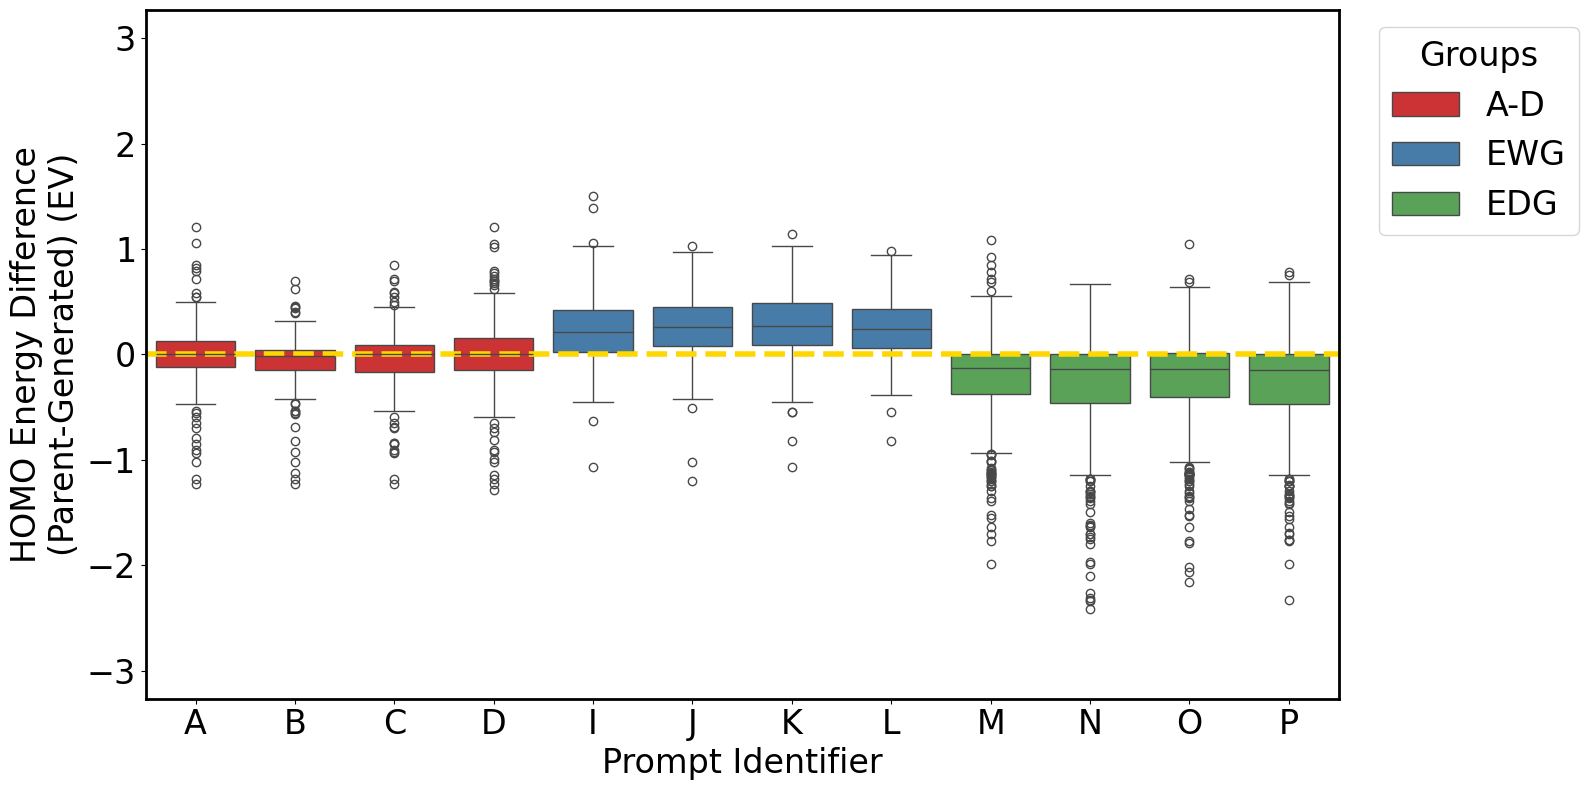

/content/drive/MyDrive/FACT_EFRC/Claude-GPT-paper/dependent_functions/homo_lumo_energies.py:325: UserWarning: The palette list has more values (12) than needed (3), which may not be intended.
  ax = sns.boxplot(x='Prompt', y='Energy Difference', hue='Group', data=df_energy_diff[df_energy_diff['Type'] == type_key], palette=palette, order=plot_order)


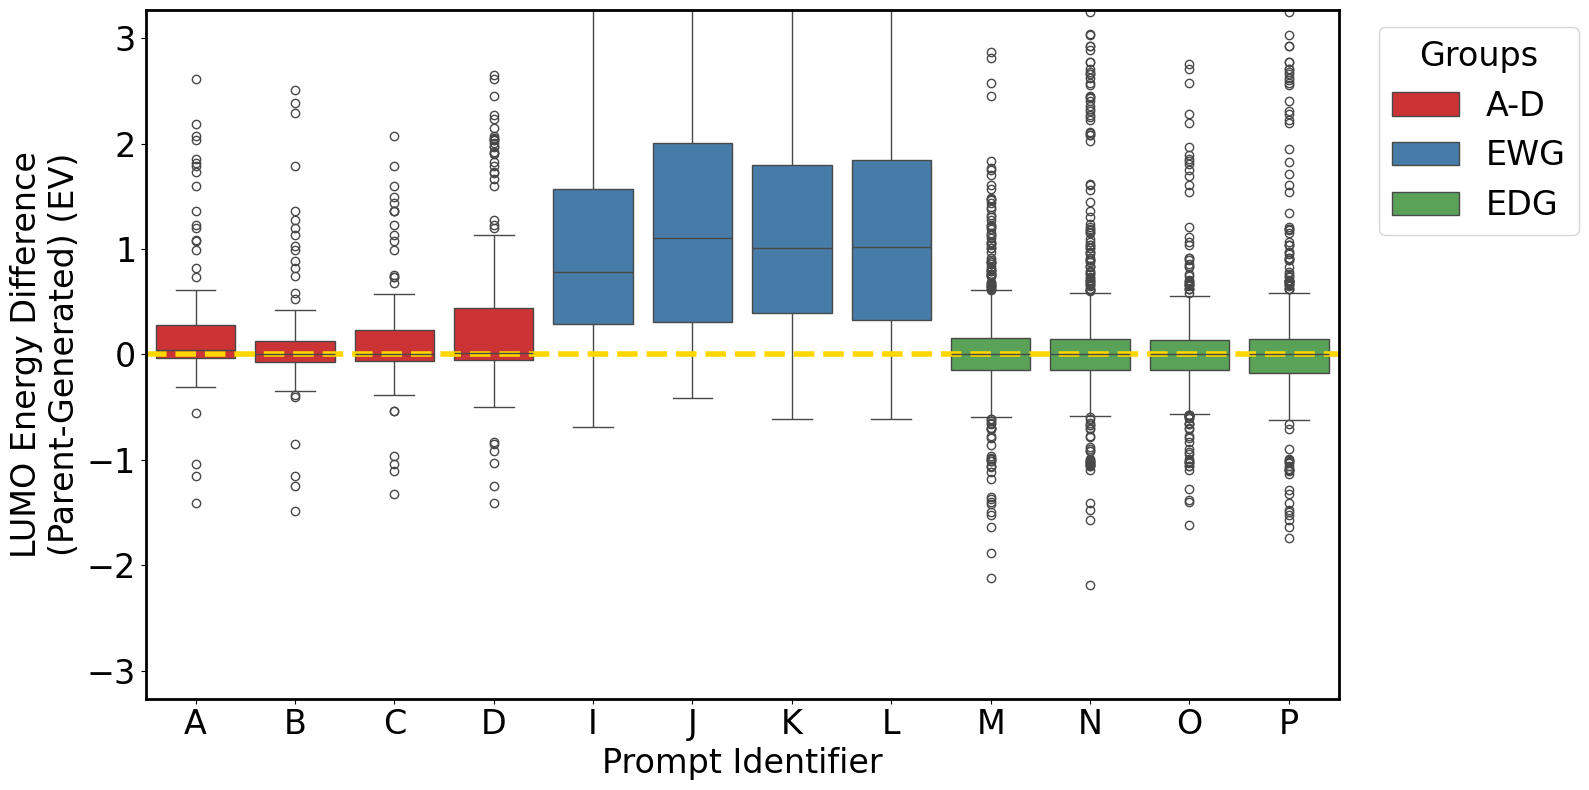

In [ ]:
homo_lumo_save_path_filename='homo_lumo'


plot_combined_homo_lumo_energy_differences(A_H_results['energy_differences_deviation_by_prompt'],
                                           EWG_results['energy_differences_deviation_by_prompt'],
                                           EDG_results['energy_differences_deviation_by_prompt'],
                                           A_H_results['filtered_prompt_mapping'],
                                           EWG_results['filtered_prompt_mapping'],
                                           EDG_results['filtered_prompt_mapping'],
                                           figsize=(16, 8),
                                           condense_percentile=0.99,
                                           save_path=homo_lumo_save_path_filename)
